In [33]:
!pip install ucimlrepo

In [34]:
from ucimlrepo import fetch_ucirepo



magic_gamma_telescope = fetch_ucirepo(id=159)
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

# Dataset :

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

In [36]:
len(X)


19020

In [37]:
name = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fDist","class"]
df = pd.concat([X,y], axis=1)
df["class"] = (df["class"] == "g").astype(int)
df.sample(5)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
2439,80.1507,27.6908,3.0946,0.2115,0.1194,52.3891,85.8081,14.8604,0.3020,265.9840,1
9350,32.3974,15.6820,2.6946,0.3899,0.2515,10.8371,19.8756,12.8018,20.7311,188.0960,1
5215,70.4444,32.0827,2.9403,0.2169,0.1199,-2.9524,-93.9820,-19.5125,76.3636,61.9936,1
6168,112.3970,55.1214,4.3829,0.0750,0.0406,-77.9553,82.2024,33.7977,1.2850,283.4820,1
8202,53.1406,19.0322,2.7868,0.2369,0.1234,85.8011,-47.4196,6.9362,2.7357,193.5620,1


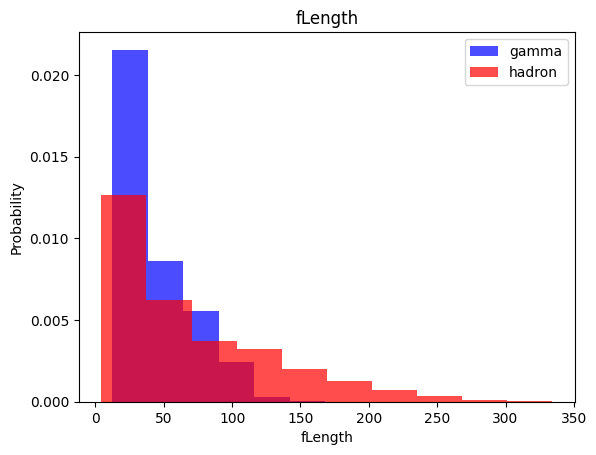

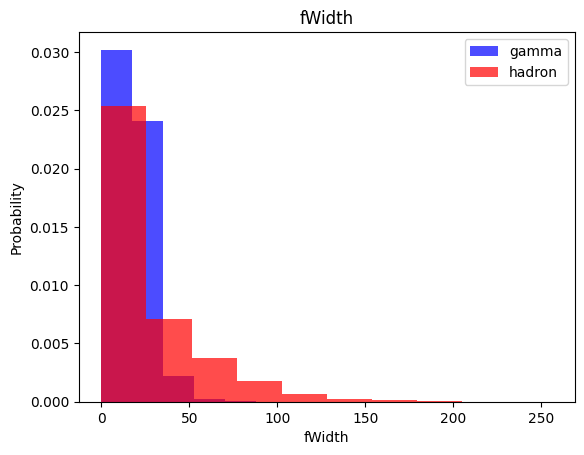

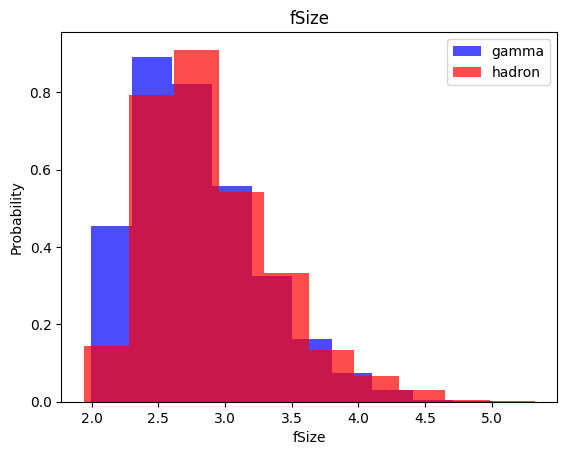

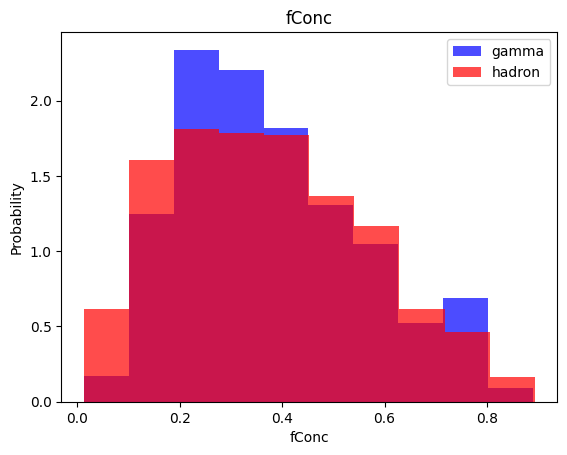

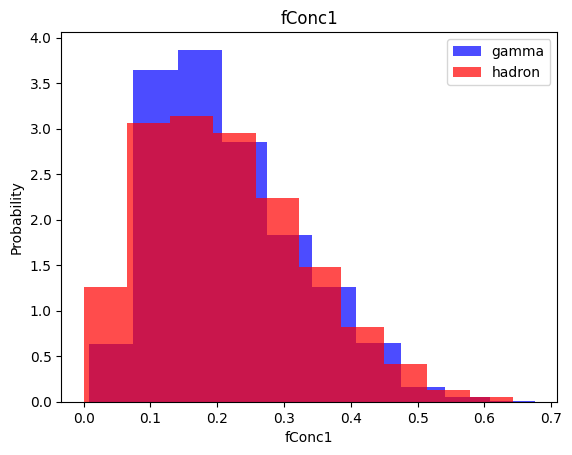

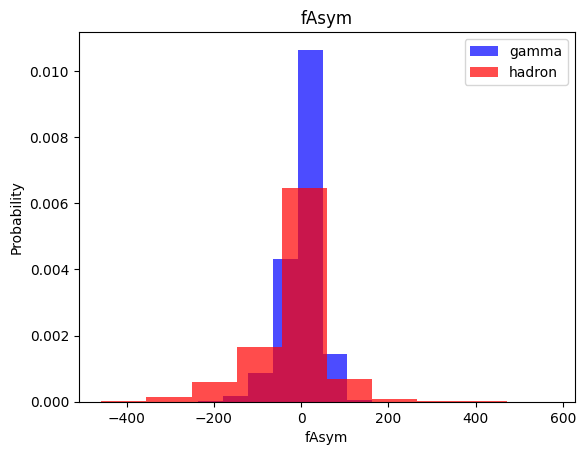

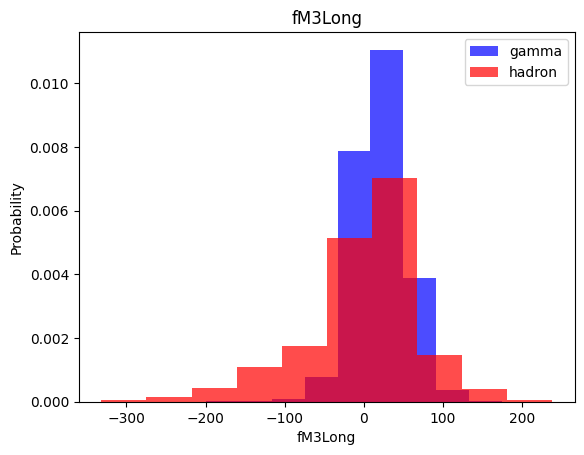

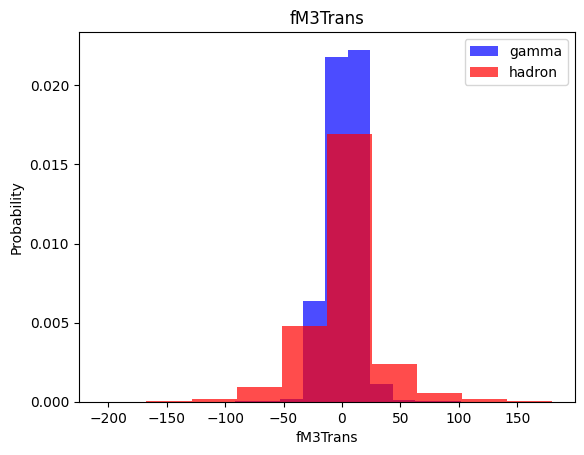

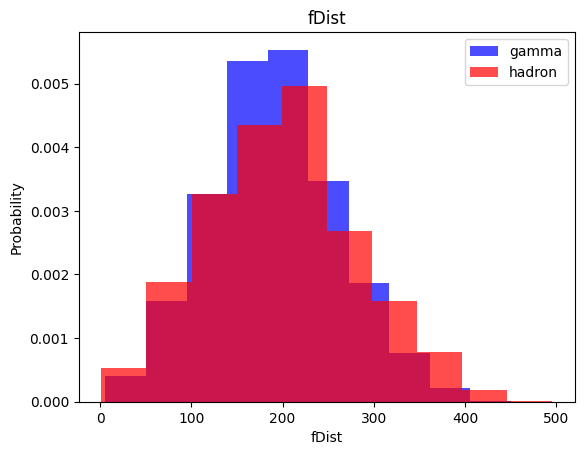

In [38]:
for label in name[:-1]:  # skip "class"
    plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()
    plt.show()


- Train,validate and test data sets

In [39]:
# Shuffle the DataFrame
df = shuffle(df, random_state=42).reset_index(drop=True)

# Compute split indices
train_end = int(0.6 * len(df))
valid_end = int(0.8 * len(df))


# Perform split
train, valid, test = np.split(df, [train_end, valid_end])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [40]:
def scale_dataset(dataframe, oversample=False):
    # Separate features and label
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    # Scale features
    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    #  oversampling to balance classes
    if oversample:
        r = RandomOverSampler()
        x, y = r.fit_resample(x, y)

    # Reshape and combine for unified dataset
    data = np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y

In [41]:
train,x_train,y_train = scale_dataset(train, oversample=True)
valid,x_valid,y_valid = scale_dataset(valid, oversample=False)
test,x_test,y_test  = scale_dataset(test, oversample=False)

#kNN Implementation


In [42]:
from sklearn.neighbors import KNeighborsClassifier

Training the model

In [43]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Predicting the outcome

In [44]:
y_pred = knn_model.predict(x_test)

Classification report(accuracy,precision,recall,f1score)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1331
           1       0.85      0.85      0.85      2473

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#Naive-Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)


GaussianNB()

In [48]:
y_pred = nb_model.predict(x_test)


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.38      0.49      1331
           1       0.73      0.89      0.80      2473

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



#Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [52]:
y_pred = lg_model.predict(x_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1331
           1       0.84      0.81      0.82      2473

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.77      0.78      3804



#Support Vector Machines(SVM)

In [54]:
from sklearn.svm import SVC

In [55]:
svm_model  = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [56]:
y_pred = svm_model.predict(x_test)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1331
           1       0.88      0.90      0.89      2473

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



#Neural Network

In [58]:
import tensorflow as tf

Plot defination

In [59]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy loss')
  ax1.legend()
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()

Developing and training the model

In [64]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
                              ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

  return nn_model, history

Figuring out least value loss and best model

Training model with 16 nodes, dropout=0, learning rate=0.01, batch size=32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7890 - loss: 0.4442 - val_accuracy: 0.7881 - val_loss: 0.4219
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8481 - loss: 0.3546 - val_accuracy: 0.7082 - val_loss: 0.5292
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8555 - loss: 0.3425 - val_accuracy: 0.7476 - val_loss: 0.4929
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8665 - loss: 0.3301 - val_accuracy: 0.6849 - val_loss: 0.6109
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8698 - loss: 0.3201 - val_accuracy: 0.7456 - val_loss: 0.4633
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8655 - loss: 0.3232 - val_accuracy: 0.7618 - val_loss: 0.4523
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8695 - loss: 0.3171 - val_accuracy: 0.7446 - val_loss: 0.4845
Epoch 8/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8576 - loss: 0.3310 - val_accu

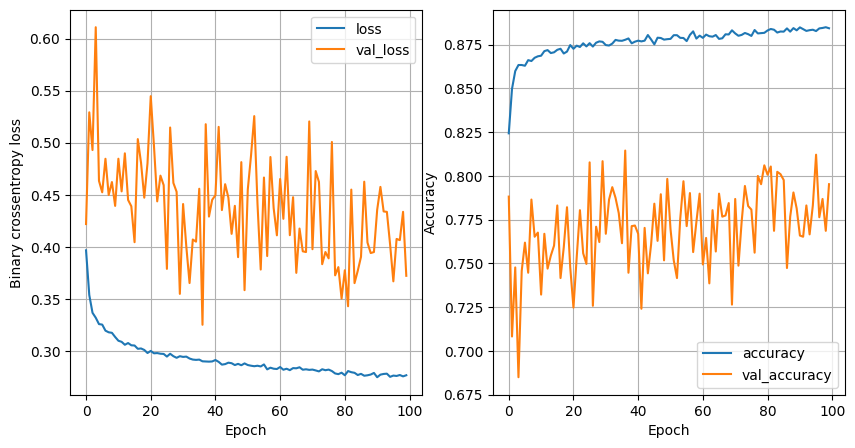

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8788 - loss: 0.3177
Training model with 16 nodes, dropout=0, learning rate=0.01, batch size=64
Epoch 1/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7731 - loss: 0.4739 - val_accuracy: 0.6835 - val_loss: 0.6170
Epoch 2/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8403 - loss: 0.3677 - val_accuracy: 0.7753 - val_loss: 0.4533
Epoch 3/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8568 - loss: 0.3409 - val_accuracy: 0.7635 - val_loss: 0.4586
Epoch 4/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8657 - loss: 0.3252 - val_accuracy: 0.7632 - val_loss: 0.4838
Epoch 5/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8675 - loss: 0.3231 - val_accuracy: 0.7686 - val_loss: 0.4637
Epoch 6/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8622 - loss: 0.3264 - val_accuracy: 0.7706 - val_loss: 0.4462
Epoch 7/100
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8650 - lo

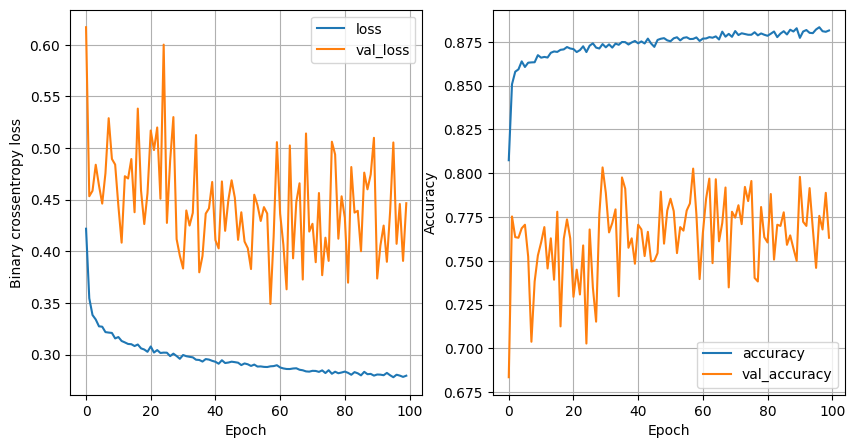

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8721 - loss: 0.3116
Training model with 16 nodes, dropout=0, learning rate=0.01, batch size=128
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7525 - loss: 0.4942 - val_accuracy: 0.7456 - val_loss: 0.4978
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8533 - loss: 0.3515 - val_accuracy: 0.7257 - val_loss: 0.5287
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8543 - loss: 0.3405 - val_accuracy: 0.7237 - val_loss: 0.5538
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8597 - loss: 0.3363 - val_accuracy: 0.6926 - val_loss: 0.6090
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8645 - loss: 0.3259 - val_accuracy: 0.7406 - val_loss: 0.4818
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8578 - loss: 0.3211 - val_accuracy: 0.7314 - val_loss: 0.4967
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8550 - loss: 0.3283 - 

KeyboardInterrupt: 

In [65]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"Training model with {num_nodes} nodes, dropout={dropout_prob}, learning rate={lr}, batch size={batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss, _ = model.evaluate(x_valid, y_valid)
        if val_loss < least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model

In [66]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test,y_pred))


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1331
           1       0.87      0.94      0.90      2473

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

